In [1]:
import pandas as pd
import matplotlib as plt
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
pwd

'/content'

In [4]:
dir = "drive/My Drive/BT4221/Data/"

# cleaned train dataset
df = pd.read_csv(dir+"cleaned_train.csv")

# for EDA
data_raw = pd.read_csv(dir+"train.csv")

In [16]:
clean

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,word_count,char_count,word_density,total_length,capitals,capitals_prop,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_unique_words,prop_unique_words,processed_text,polarity,subjectivity
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,43,223,0.191964,264,17,0.064394,0,1,6,0,41,0.953488,explanation edits made username hardcore metal...,0.136364,0.454545
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,17,95,0.177083,112,8,0.071429,1,0,5,0,17,1.000000,daww match background colour seemingly stuck t...,0.200000,0.200000
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,42,192,0.217617,233,4,0.017167,0,0,4,0,39,0.928571,hey man really trying edit war guy constantly ...,0.150000,0.383333
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,113,511,0.220703,622,11,0.017685,0,0,6,0,82,0.725664,ca nt make real suggestion improvement wondere...,0.183333,0.297222
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,13,55,0.232143,67,2,0.029851,0,1,3,0,13,1.000000,sir hero chance remember page,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159497,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,47,247,0.189516,295,2,0.006780,0,2,8,0,44,0.936170,second time asking view completely contradicts...,0.220000,0.480000
159498,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,18,81,0.219512,99,2,0.020202,0,0,4,0,18,1.000000,ashamed horrible thing put talk page,-1.000000,1.000000
159499,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,12,69,0.171429,81,4,0.049383,0,0,3,0,12,1.000000,spitzer umm there actual article prostitution ...,0.000000,0.100000
159500,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,25,92,0.268817,116,2,0.017241,0,0,1,0,23,0.920000,look like actually put speedy first version de...,0.125000,0.216667


In [17]:
clean = df[df['toxic'] == 0]
clean = clean[clean['severe_toxic'] == 0]
clean = clean[clean['obscene'] == 0]
clean = clean[clean['identity_hate'] == 0]
clean = clean[clean['insult'] == 0]
clean = clean[clean['threat'] == 0]
clean.shape

(143278, 23)

In [ ]:
data_raw.shape

(159571, 8)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


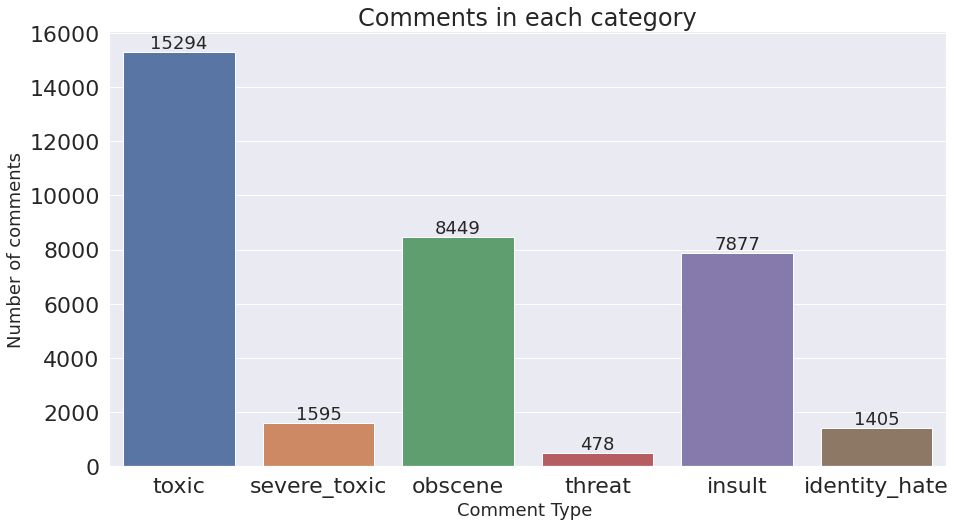

In [ ]:
# Comments in each category
categories = list(data_raw.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories[2:], data_raw.iloc[:,2:].sum().values)
plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


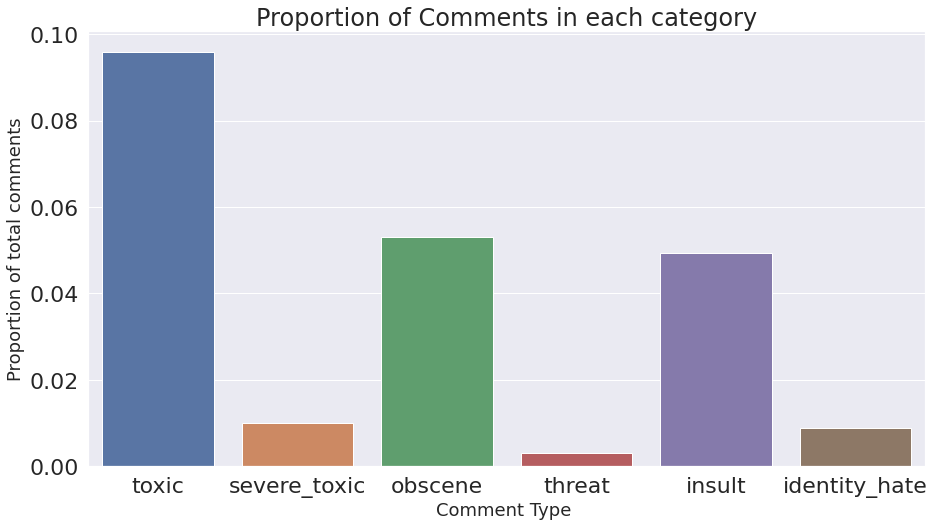

In [ ]:
# Proportion of comments in each category
categories = list(data_raw.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories[2:], (data_raw.iloc[:,2:].sum().values/data_raw.shape[0]))
plt.title("Proportion of Comments in each category", fontsize=24)
plt.ylabel('Proportion of total comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values/data_raw.shape[0]
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


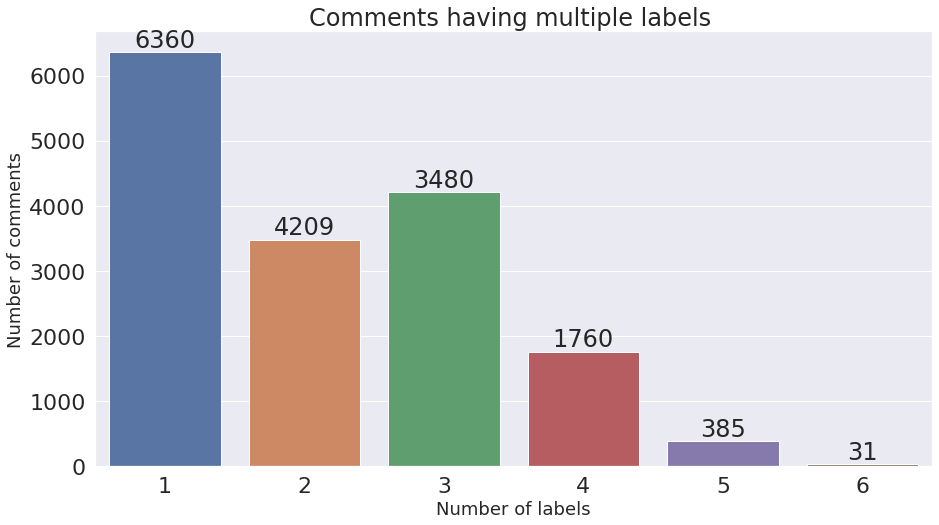

In [ ]:
# Comments having multiple labels
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [ ]:
# pairwise correlation matrix 
data_raw.iloc[:, 2:].corr()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


In [ ]:
# MLSMOTE

# -*- coding: utf-8 -*-
# Importing required Library
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors

def get_tail_label(df):
    """
    Give tail label colums of the given target dataframe
    
    args
    df: pandas.DataFrame, target label df whose tail label has to identified
    
    return
    tail_label: list, a list containing column name of all the tail label
    """
    columns = df.columns
    n = len(columns)
    irpl = np.zeros(n)
    for column in range(n):
        irpl[column] = df[columns[column]].value_counts()[1]
    irpl = max(irpl)/irpl
    mir = np.average(irpl)
    tail_label = []
    for i in range(n):
        if irpl[i] > mir:
            tail_label.append(columns[i])
    return tail_label

def get_index(df):
  """
  give the index of all tail_label rows
  args
  df: pandas.DataFrame, target label df from which index for tail label has to identified
    
  return
  index: list, a list containing index number of all the tail label
  """
  tail_labels = get_tail_label(df)
  index = set()
  for tail_label in tail_labels:
    sub_index = set(df[df[tail_label]==1].index)
    index = index.union(sub_index)
  return list(index)

def get_minority_instace(X, y):
    """
    Give minority dataframe containing all the tail labels
    
    args
    X: pandas.DataFrame, the feature vector dataframe
    y: pandas.DataFrame, the target vector dataframe
    
    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    index = get_index(y)
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

def nearest_neighbour(X):
    """
    Give index of 5 nearest neighbor of all the instance
    
    args
    X: np.array, array whose nearest neighbor has to find
    
    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
    euclidean,indices= nbs.kneighbors(X)
    return indices

def MLSMOTE(X,y, n_sample, orginal_df):
    """
    Give the augmented data using MLSMOTE algorithm
    
    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample
    
    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0,n-1)
        neighbour = random.choice(indices2[reference,1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val>2 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbour,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    new_X = pd.concat([X, new_X], axis=0)
    target = pd.concat([y, target], axis=0)
    return new_X, target


In [ ]:
# creating df for sampling purposes, drop those none numeric columns
sampling_df = df.drop(['id', 'comment_text', 'processed_text'], axis=1)

In [ ]:
# get feature space and label space
X = sampling_df.iloc[:, 6:]
Y = sampling_df.iloc[:, :6]

In [ ]:
# Identify minority instances
X_sub, y_sub = get_minority_instace(X, Y)

In [ ]:
# Oversampling
X_res,y_res = MLSMOTE(X_sub, y_sub, 50000)

In [ ]:
oversampled = pd.concat([X_res, y_res], axis=1)
# combined oversamples with previously untouched datasets
oversampled = pd.concat([oversampled, df])

In [ ]:
oversampled = pd.concat([oversampled, df])

In [ ]:
oversampled_charting = oversampled[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [ ]:
oversampled_charting

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,1.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...
159497,0.0,0.0,0.0,0.0,0.0,0.0
159498,0.0,0.0,0.0,0.0,0.0,0.0
159499,0.0,0.0,0.0,0.0,0.0,0.0
159500,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


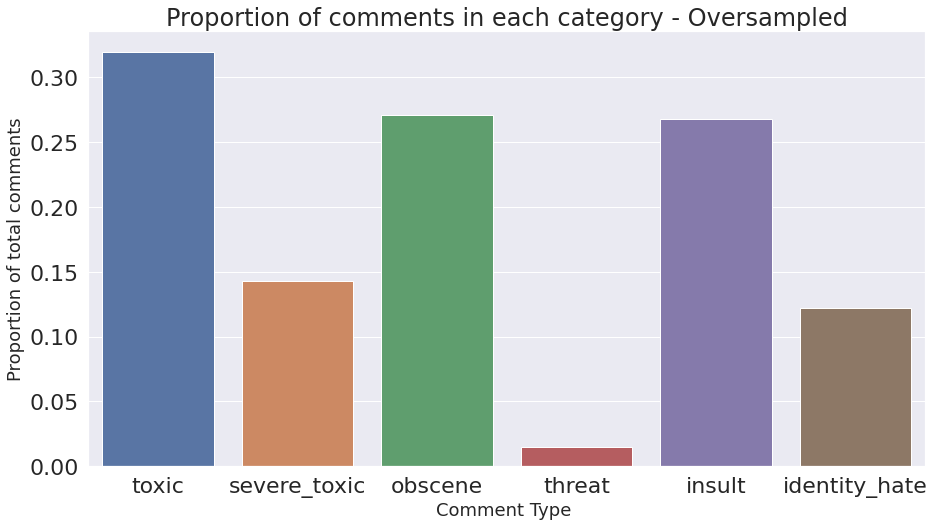

In [ ]:
categories = list(oversampled_charting.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, (oversampled_charting.sum().values/oversampled_charting.shape[0]))
plt.title("Proportion of comments in each category - Oversampled", fontsize=24)
plt.ylabel('Proportion of total comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = oversampled_charting.sum().values/oversampled_charting.shape[0]
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

In [ ]:
oversampled

,word_count,char_count,word_density,total_length,capitals,capitals_prop,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_unique_words,prop_unique_words,polarity,subjectivity,toxic,severe_toxic,obscene,threat,insult,identity_hate,id,comment_text,processed_text
0,8.0,37.0,0.210526,44.0,37.0,0.840909,0.0,0.0,0.0,0.0,8.0,1.000000,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN
1,117.0,538.0,0.217069,648.0,22.0,0.033951,7.0,1.0,10.0,0.0,88.0,0.752137,0.030556,0.438889,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN
2,19.0,71.0,0.263889,89.0,1.0,0.011236,1.0,0.0,0.0,0.0,18.0,0.947368,-0.500000,0.900000,1.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN
3,13.0,54.0,0.236364,64.0,4.0,0.062500,4.0,0.0,0.0,0.0,13.0,1.000000,0.000000,0.033333,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
4,7.0,36.0,0.189189,42.0,1.0,0.023810,0.0,0.0,1.0,0.0,7.0,1.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159497,47.0,247.0,0.189516,295.0,2.0,0.006780,0.0,2.0,8.0,0.0,44.0,0.936170,0.220000,0.480000,0.0,0.0,0.0,0.0,0.0,0.0,ffe987279560d7ff,""":::::And for the second time of asking, when ...",second time asking view completely contradicts...
159498,18.0,81.0,0.219512,99.0,2.0,0.020202,0.0,0.0,4.0,0.0,18.0,1.000000,-1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,ashamed horrible thing put talk page
159499,12.0,69.0,0.171429,81.0,4.0,0.049383,0.0,0.0,3.0,0.0,12.0,1.000000,0.000000,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",spitzer umm there actual article prostitution ...
159500,25.0,92.0,0.268817,116.0,2.0,0.017241,0.0,0.0,1.0,0.0,23.0,0.920000,0.125000,0.216667,0.0,0.0,0.0,0.0,0.0,0.0,fff125370e4aaaf3,And it looks like it was actually you who put ...,look like actually put speedy first version de...
